In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/seq_len_exps.csv")

In [3]:
name_map = {
    "model-sentence-transformers/gtr-t5-base_corrector-gtr-base_steps-50_beam-0_nucleus-False": "gtr-nq-32",
    "model-Xenova/text-embedding-ada-002_corrector-text-embedding-ada-002_steps-50_beam-0_nucleus-False": "ada-ms-128",
}

In [4]:
data["Name"] = data["Name"].map(name_map)
data["method"] = data["Name"]

In [5]:
data = data[["method", "max_seq_length", "bleu_score"]]

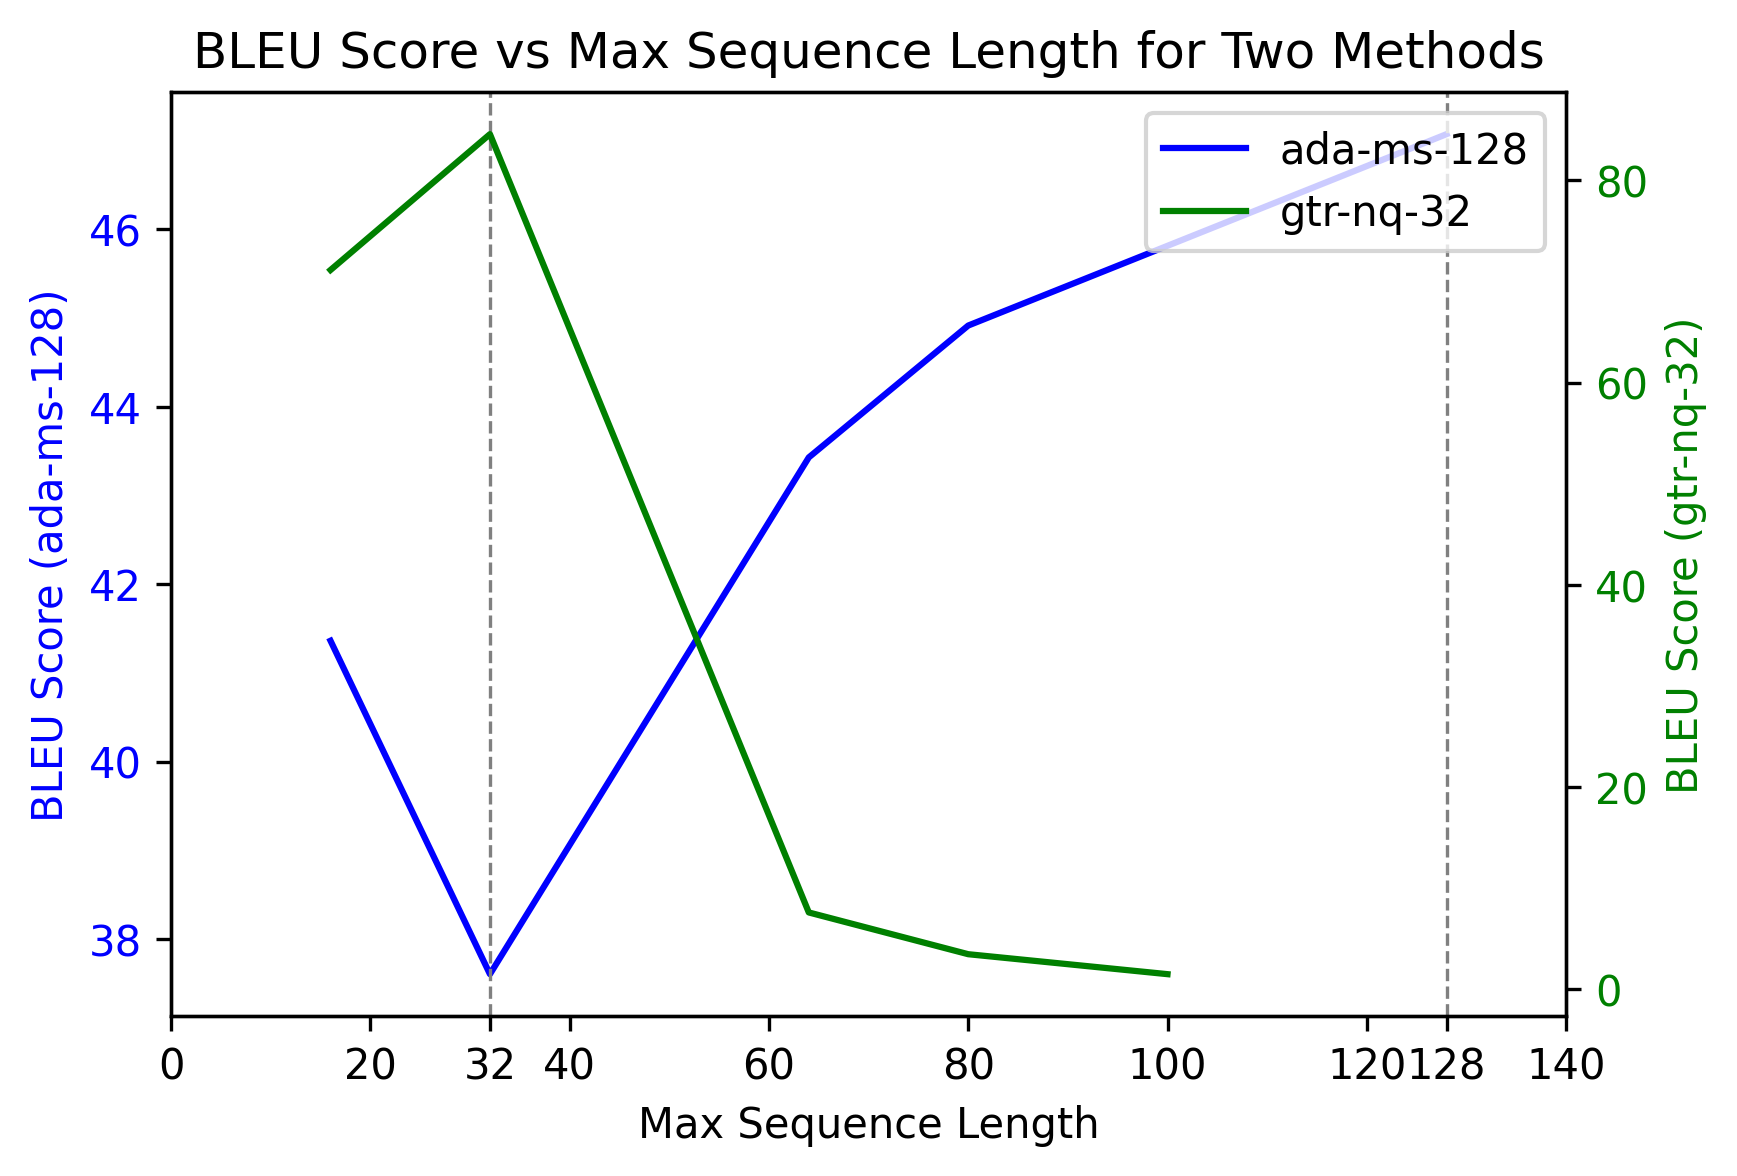

In [ ]:
import matplotlib.pyplot as plt

# Select two methods (assuming there are at least two)
methods = data['method'].unique()

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(5, 3), dpi=300)

# Plot the first method as a line
method1 = methods[0]
method1_data = data[data['method'] == method1].sort_values(by="max_seq_length")
line1, = ax1.plot(method1_data["max_seq_length"], method1_data["bleu_score"], color='b', label=method1)
ax1.set_xlabel("Max Sequence Length")
ax1.set_ylabel(f"BLEU Score ({method1})", color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the second method as a line
method2 = methods[1]
method2_data = data[data['method'] == method2].sort_values(by="max_seq_length")
line2, = ax2.plot(method2_data["max_seq_length"], method2_data["bleu_score"], color='g', label=method2)
ax2.set_ylabel(f"BLEU Score ({method2})", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Combine the legends' handles and labels
lines = [line1, line2]
labels = [line1.get_label(), line2.get_label()]

# Create a combined legend from both axes
ax1.legend(lines, labels, loc='upper right')

# Add a title
plt.title("BLEU Score vs Max Sequence Length for Two Methods")

# Set custom x-ticks, including at 32 and 128
current_xticks = ax1.get_xticks().tolist()  # Get the current list of x-ticks
new_xticks = sorted(set(current_xticks + [32, 128]))  # Combine with new ticks and sort
ax1.set_xticks(new_xticks)

# Add dashed vertical lines at 32 and 128
ax1.axvline(x=32, color='gray', linestyle='--', linewidth=0.8)
ax1.axvline(x=128, color='gray', linestyle='--', linewidth=0.8)

# Show the plot
plt.savefig("seq_len_exps.pdf")

In [27]:
data = pd.read_csv("./data/tab2.csv")

In [28]:
data = data[["dataset", "num_steps", "token_set_f1", "bleu_score"]]

In [30]:
data.sort_values(by=["dataset", "num_steps"], inplace=True)

In [31]:
data

,dataset,num_steps,token_set_f1,bleu_score
1,bioasq,0,0.305911,3.547312
0,bioasq,50,0.421984,8.673503
2,climate-fever,50,0.807750,54.850043
4,msmarco,0,0.550182,17.273264
3,msmarco,50,0.849259,58.093898
5,nfcorpus,50,0.461436,11.377419
7,nq,0,0.364689,6.196432
6,nq,50,0.530392,14.784671
9,quora,0,0.772356,40.004647
8,quora,50,0.984934,95.690211
